In [40]:
import numpy as np
from scipy.stats import beta
from scipy.stats import sem
from matplotlib import pyplot as plt

## Problem 10.1

In [30]:
## estimate our integral taking n samples from Beta distribution
## get SE less thanb 10^-3
n = 100000
a = 1
b = 2

# actual calculated on Wolfram
actual = 0.40231

h = lambda x: 1 / (x**3 + 2*x + 3)

# n draws from Beta Distribution
x_i = np.random.beta(a,b,n)

# Compute estimate
estimate = np.pi * (1/n * (np.sum(h(x_i * np.pi) / beta.pdf(x_i, a, b))))
std_err = sem(np.pi * h(x_i * np.pi))

print("Apprx: ", estimate)
print("True Value: ", actual)
print("Difference: ", abs(actual - estimate))
print("Standard Err: ", std_err)

Apprx:  0.40258769540337186
True Value:  0.40231
Difference:  0.00027769540337185816
Standard Err:  0.0008766088221688153


## Problem 10.3

In [31]:
def discrete_inverse_trans(prob_vec):
    U = uniform.rvs(size=1)
    if U <= prob_vec[0]:
        return 1
    else:
        for i in range(1,len(prob_vec)+1):
            if sum(prob_vec[0:i])<U and sum(prob_vec[0:i+1])>U:
                return i+1
            
def discrete_samples(prob_vec,n=1):
    sample=[]
    for i in range(0,n):
        sample.append(discrete_inverse_trans(prob_vec))
    return np.array(sample)



## Problem 10.4

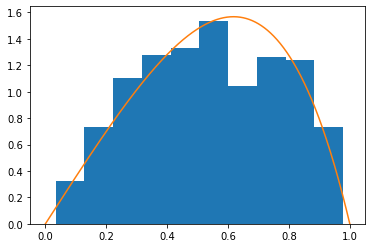

In [49]:
pdf = lambda x: (x*(1-x)*np.exp(x))*3.58
uni_draw = []
x = np.linspace(0,1,1000)
for _ in range(1000):
    uni_draw.append(np.random.uniform(0,1,2))

uni_draw = np.array(uni_draw)

actual_vals = pdf(uni_draw[:,0])

kept_points = uni_draw[:,0][uni_draw[:,1] < actual_vals]

plt.hist(kept_points, density=True)
plt.plot(x, pdf(x))
plt.show()